In [13]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [14]:
dir="C:/Users/Expedition/Desktop/expedition2025summer/"

In [ ]:
#data = ert.load(dir + '11Aug/nuna_a32_transect_long.dat')
#data.save(dir + '11Aug/nuna_a32_transect_long.txt', "a b m n err rhoa")

13/08/25 - 18:58:21 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [18]:
data = ert.load(dir + '22Aug/tuk_h30_h1.tx0')

24/08/25 - 18:23:44 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
24/08/25 - 18:23:44 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
24/08/25 - 18:23:44 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
24/08/25 - 18:23:44 - pyGIMLi - INFO - No electrode positions found!
24/08/25 - 18:23:44 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 565


In [19]:
data['err'] = data['err'] + 0.02

In [ ]:
#data['err'] = data['iperr']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x182a2b3fbd0>)

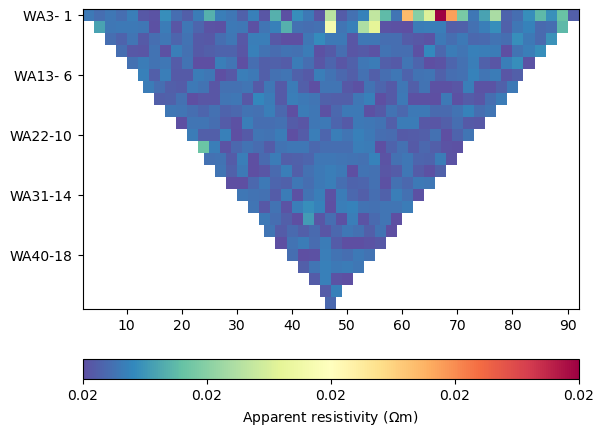

In [20]:
ert.showData(data,data['err'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x182a2b0fbd0>)

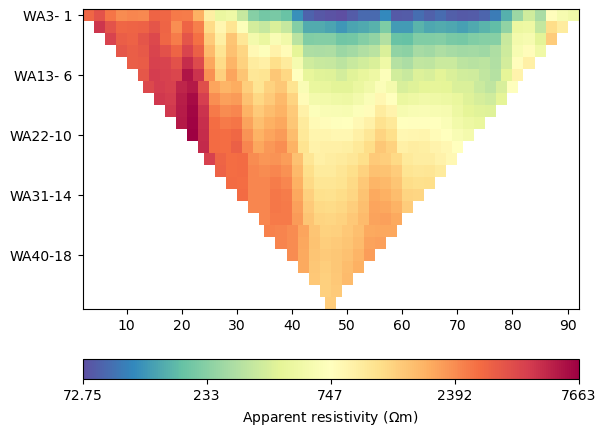

In [21]:
ert.showData(data)

In [22]:
data["k"] = ert.createGeometricFactors(data)

24/08/25 - 18:24:03 - pyGIMLi - INFO - Save RVector binary
24/08/25 - 18:24:03 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\4912078696190845302


24/08/25 - 18:31:49 - pyGIMLi - INFO - Found 2 regions.
24/08/25 - 18:31:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/08/25 - 18:31:49 - pyGIMLi - INFO - Found 2 regions.
24/08/25 - 18:31:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/08/25 - 18:31:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/08/25 - 18:31:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/08/25 - 18:31:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 15149 Cells: 29920 Boundaries: 22628
24/08/25 - 18:31:50 - pyGIMLi - INFO - Use median(data values)=1091.6
24/08/25 - 18:31:50 - pyGIMLi - INFO - Created startmodel from forward operator:6466, min/max=1091.600000/1091.600000
24/08/25 - 18:31:50 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000018298B20BD0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 72.75/7663
min/max (error): 2%/2.31%
min/max (start model): 1092/1092
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2511.33
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  196.93 (dPhi = 92.13%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  143.31 (dPhi = 27.19%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   95.28 (dPhi = 33.22%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   12.23 (dPhi = 86.12%) lam: 

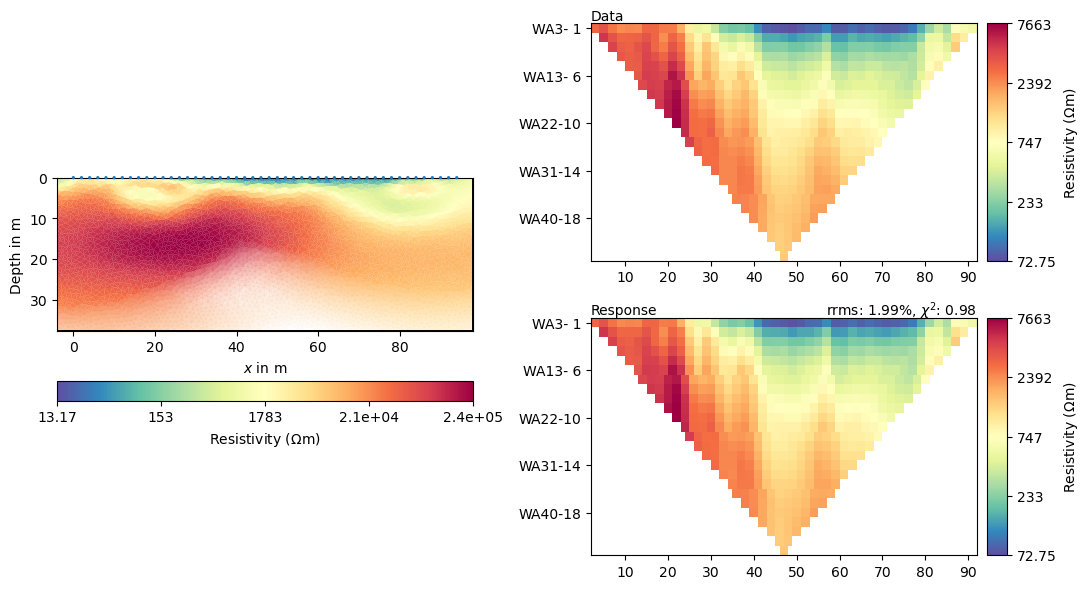

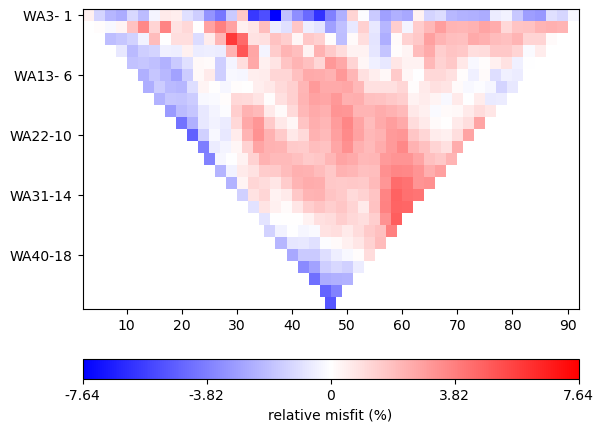

In [26]:
mgr = ert.ERTManager(data)
mgr.invert(data, verbose=True, paraDX = 0.25, zWeight=0.2, paraDZ= 0.25, lam=20, paraMaxCellSize=1)
mgr.showResultAndFit()
mgr.showMisfit()

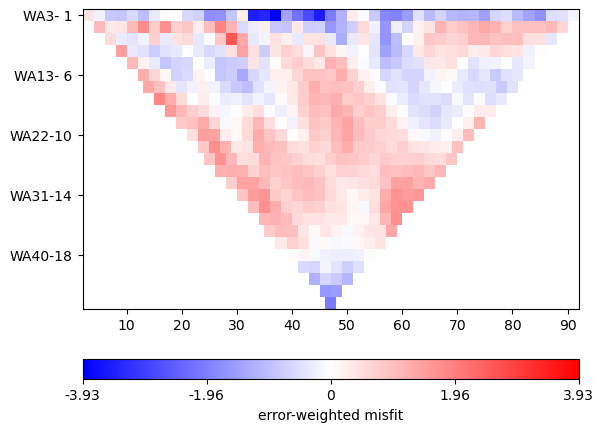

In [24]:
mgr.showMisfit(errorWeighted=True)

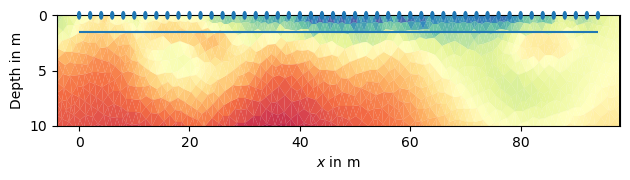

In [27]:
ax, cb = mgr.showResult(colorBar=False)
ax.hlines([-1.5], 0, 94)
ax.set_ylim(-10, 0)
ax.set_aspect(2)



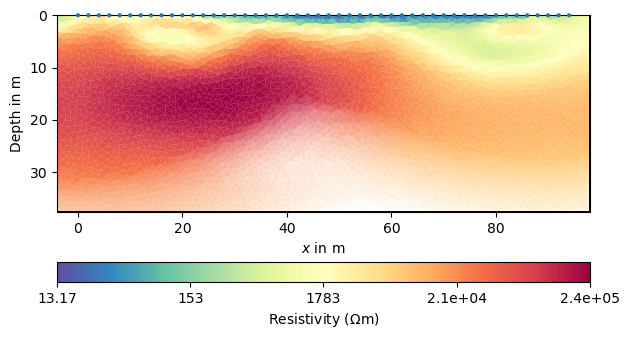

In [28]:
ax, cb = mgr.showResult()

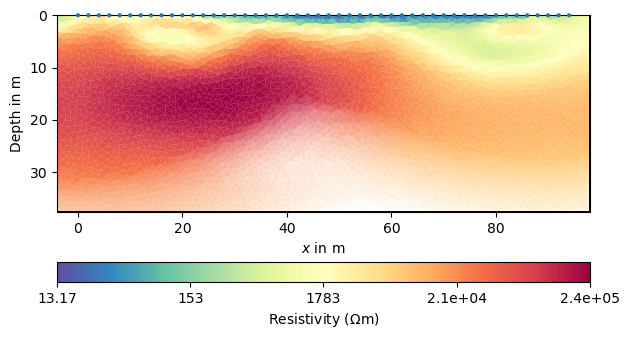

In [29]:
ax, cb = mgr.showResult()